<a href="https://colab.research.google.com/github/jainakki16/R-D/blob/main/R%26D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
1. Tableau
2. EDA
3. Report
4. Plot of each func
5. 1-D plot





#Analysis of the Chat transcript 

Data will be collected from the chat transcripts of different courses to extract the different information 
regarding interaction of the students, types of question, innovative ideas etc.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


# Importing Libraries

In [2]:
!pip install python-docx --quiet

     |████████████████████████████████| 5.5MB 8.4MB/s 


In [3]:
import os
import re
import docx
import operator
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

sns.set_style('darkgrid')
nltk.download("punkt")
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reading Data

In [4]:
def read_data(path):
  time = []
  name = []
  chat = []

  document = docx.Document(path)

  for para in document.paragraphs:
    line = para.text.split()
    if len(line) > 1:
      time.append(line[0])
      name.append(line[1] + ' ' + line[2][:-1])
      chat.append(' '.join(line[3:]))

  data = pd.DataFrame({'Time': time, 'Name': name, 'Chat': chat})

  return data

In [5]:
def create_dataset():
  dir_path = '/content/gdrive/MyDrive/R&D Project'
  dir_all_path = sorted(os.listdir(dir_path))
  data = {}

  all_student_name = {}
  student_number = 1

  for i in range(len(dir_all_path)):
    path = dir_path + '/' + dir_all_path[i]
    data[f'data_{i + 1}'] = read_data(path)
    
    replace_name = {}
    new_name = []
    student_number = 1
    teacher_number = 1

    for name in data[f'data_{i + 1}']['Name']:
      if name == 'Ratna Sanyal':
        replace_name[name] = 'teacher_' + str(teacher_number)
      elif name not in replace_name:
        replace_name[name] = 'student_' + str(student_number)
        student_number += 1
      new_name.append(replace_name[name])

    data[f'data_{i + 1}']['Name'] = new_name

  return data

In [6]:
dataset = create_dataset()

# Number of questions asked by faculty


In [7]:
def get_professor_question(data, professor_name):
  return data[data['Name'] == professor_name]

In [8]:
j = 0
for i in dataset:
  j += 1
  print(f"Number of questions asked by faculty in session-{j} : {get_professor_question(dataset[i], 'teacher_1').shape[0]}\n")

Number of questions asked by faculty in session-1 : 0

Number of questions asked by faculty in session-2 : 4

Number of questions asked by faculty in session-3 : 15

Number of questions asked by faculty in session-4 : 2

Number of questions asked by faculty in session-5 : 2

Number of questions asked by faculty in session-6 : 0

Number of questions asked by faculty in session-7 : 1

Number of questions asked by faculty in session-8 : 0



# Questions asked by faculty with their timestamp

In [9]:
j = 0
for i in dataset:
  j += 1
  if get_professor_question(dataset[i], 'teacher_1')[['Time', 'Chat']].shape[0] != 0:
      print(f"Time stamp of questions asked by faculty in session-{j} : \n\n \
     {get_professor_question(dataset[i], 'teacher_1')[['Time', 'Chat']]}\n")

Time stamp of questions asked by faculty in session-2 : 

               Time                                 Chat
0    00:12:59        Give the example for Homonyms
39   00:30:10         Can you example for antonyms
78   00:38:44  Write example for Hyponymy/Hypernym
110  00:45:48            Write example for Meronym

Time stamp of questions asked by faculty in session-3 : 

              Time                         Chat
0   00:29:14  I'd like to fly from A to B
2   00:31:05                           S-
7   00:33:35                     I'd like
8   00:33:40                       to fly
9   00:33:56                      S-NP PP
10  00:34:14                          I'd
11  00:34:21                  Like to fly
12  00:34:33                      S-NP VP
13  00:40:57                   The flight
14  00:41:07                       DET NN
15  00:41:17                 The * Flight
16  00:41:28               DET NOM Flight
17  00:41:51                   DET NOM NN
27  00:50:49   I prefer, a m

# Most frequent words in question

In [10]:
def get_top_five(dic):
  sorted_dict = dict(sorted(dic.items(), key=operator.itemgetter(1), reverse=True))
  top_five = {k: sorted_dict[k] for k in list(sorted_dict)[:5]}
  return top_five


Session - 2



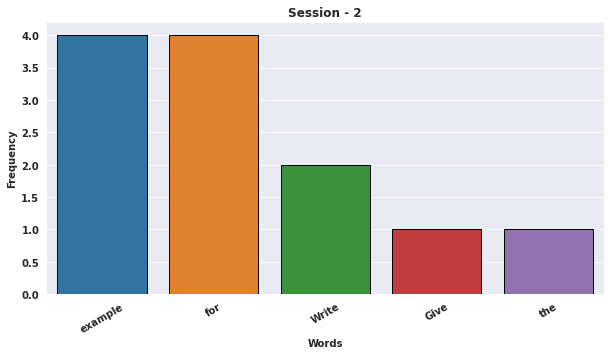


Session - 3



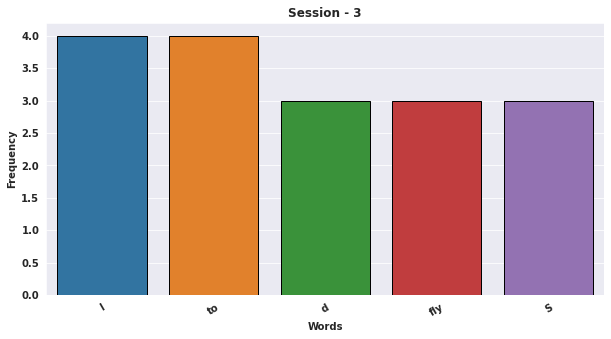


Session - 4



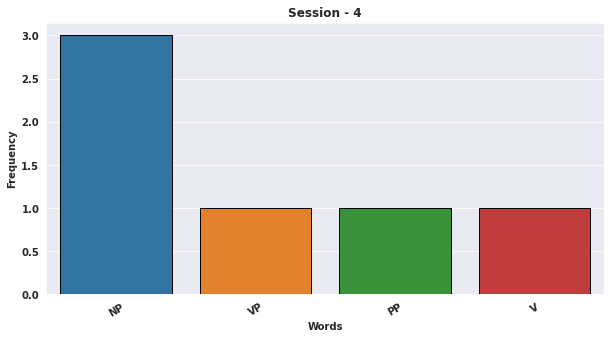


Session - 5



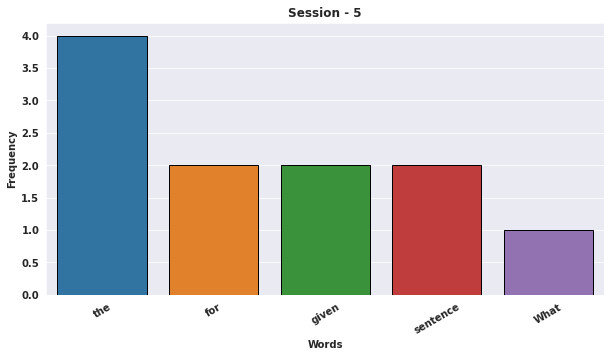


Session - 7



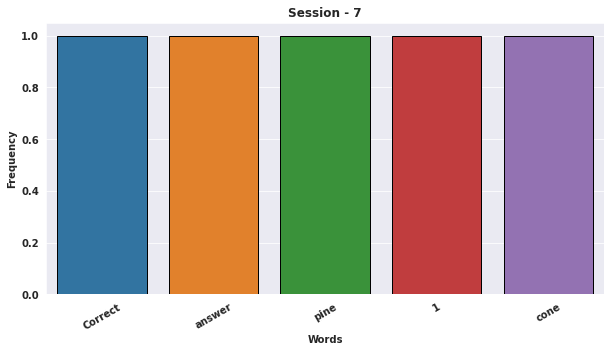

In [11]:
j = 0
for i in dataset:
  j += 1

  session = ' '.join(get_professor_question(dataset[i], 'teacher_1')['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  session = tokenizer.tokenize(session)

  if session != []:

    word_count = {}
    for word in session:
      if word in word_count:
        word_count[word] += 1
      else:
        word_count[word] = 1
    
    print(f'\nSession - {j}\n')
    plt.figure(figsize=(10, 5))

    word_count = get_top_five(word_count)
    word_count_keys = list(word_count.keys())

    sns.barplot(x = word_count_keys, y = [word_count[k] for k in word_count_keys], edgecolor = 'black')
    plt.xticks(rotation=30, weight = 'bold')
    plt.yticks(weight = 'bold')
    plt.title(f'Session - {j}', weight = 'bold')
    plt.ylabel('Frequency', weight = 'bold')
    plt.xlabel('Words', weight = 'bold')
    plt.show()

# Total number of responses in each lecture

In [12]:
def get_ans_count(data):
  return data[data['Name'] != 'teacher_1']['Name'].value_counts()

j = 0
total_student_response = {}
for i in dataset:
  j += 1
  print(f'Total number of responses by students in session-{j} : {get_ans_count(dataset[i]).sum()}')
  total_student_response[f'Session-{j}'] = get_ans_count(dataset[i]).sum()

Total number of responses by students in session-1 : 26
Total number of responses by students in session-2 : 140
Total number of responses by students in session-3 : 15
Total number of responses by students in session-4 : 8
Total number of responses by students in session-5 : 2
Total number of responses by students in session-6 : 19
Total number of responses by students in session-7 : 3
Total number of responses by students in session-8 : 17


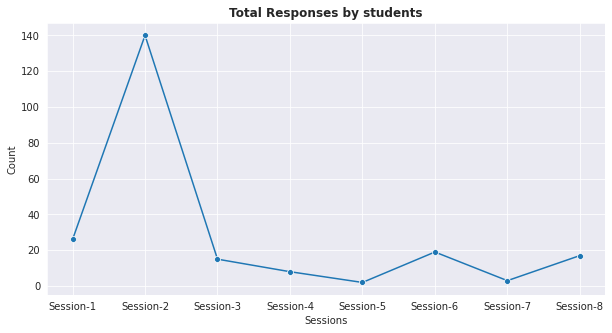

In [13]:
plt.figure(figsize=(10, 5))

total_student_response_keys = list(total_student_response.keys())
sns.lineplot(x = total_student_response_keys, 
             y = [total_student_response[k] for k in total_student_response_keys], 
             marker = "o")

plt.title('Total Responses by students', weight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sessions')
plt.show()  

# Number of responses by each student

In [14]:
def get_response_data(data):
  j = 1
  all_num_responses = {}

  for i in data:
    session_data = get_ans_count(data[i])
    for index, value in session_data.items():
      if j == 1:
        all_num_responses[index] = [value]
      else:
        if index not in all_num_responses:
          all_num_responses[index] = [0]
          while len(all_num_responses[index]) != j - 1: 
            all_num_responses[index].append(0)
        all_num_responses[index].append(value)

    for key, value in all_num_responses.items():
      if len(value) != j:
        while len(all_num_responses[key]) != j: 
            all_num_responses[key].append(0)
    j += 1


  all_session = []

  for i in range(len(data)):
    each_session = []
    for value in all_num_responses.values():
        each_session.append(value[i])
    all_session.append(each_session)

  total_session = []

  for i in range(len(all_session[0])):
    each_total = 0
    for j in range(len(all_session)):
      each_total += all_session[j][i]
    total_session.append(each_total)

  response_dic = {'student_name': list(all_num_responses.keys()), 'total_response': total_session}
  for i in range(len(data)):
    response_dic[f'session-{i + 1}'] = all_session[i]

  response_data = pd.DataFrame(response_dic).sort_values('total_response', ascending = False).head(n = 15).reset_index(drop=True)
  return response_data

In [15]:
response_data = get_response_data(dataset)

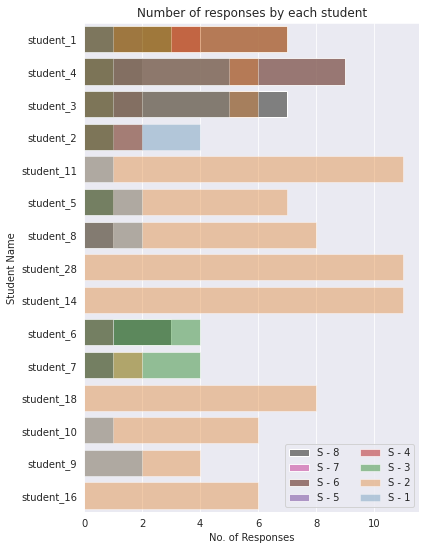

In [16]:
plt.figure(figsize=(6, 9))
color = list(sns.color_palette())
alpha = 1
for i in range(len(dataset), 0, -1):
  kwargs = {'alpha':alpha}
  sns.barplot(x=f"session-{i}", y="student_name", data=response_data, label=f"S - {i}", color=color[i-1], **kwargs)
  alpha -= 0.1

plt.xlabel('No. of Responses')
plt.ylabel('Student Name')
plt.title('Number of responses by each student')
plt.legend(ncol = 2)
plt.show()

# Responses After Each Question

In [17]:
def response_after_question(data):
  data_copy = data.copy(deep = True)
  data_copy.loc[len(data_copy.index)] = [' ', 'teacher_1', ' ']
  ques_index = data_copy.index[data_copy['Name'] == 'teacher_1'].tolist()
  
  all_responses = []
  for i in range(len(ques_index) - 1):
    all_responses.append(get_ans_count(data_copy[ques_index[i] + 1 : ques_index[i + 1]]).sum())
  return all_responses

In [18]:
def get_all_responses(data):
  j = 0
  all_responses = []
  for i in data:
    j += 1
    all_responses.append(response_after_question(data[i]))

  max_length = len(max(all_responses, key=len))
  for i in range(len(data)):
    if len(all_responses[i]) != max_length:
      diff = max_length - len(all_responses[i])
      all_responses[i].extend([0]*diff)

  return all_responses, max_length

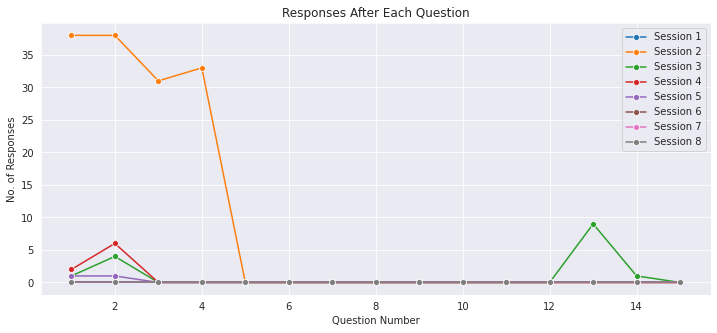

In [19]:
all_responses, max_length = get_all_responses(dataset)

plt.figure(figsize=(12, 5))
for i in range(len(all_responses)):
  sns.lineplot(x = range(1, max_length + 1), y = all_responses[i], marker = 'o', label = f'Session {i + 1}')

plt.xlabel('Question Number')
plt.ylabel('No. of Responses')
plt.title('Responses After Each Question')
plt.show()

# Most Frequent Words in Responses

In [20]:
def get_student_responses(data, professor_name):
  return data[data['Name'] != professor_name]


Session - 1



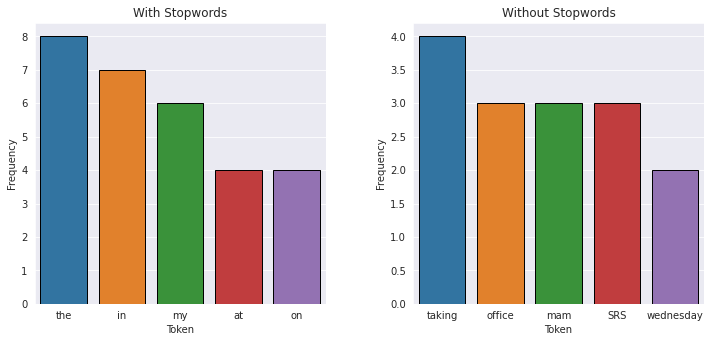


Session - 2



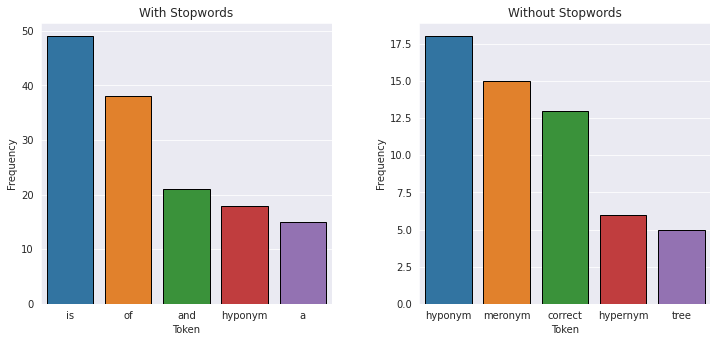


Session - 3



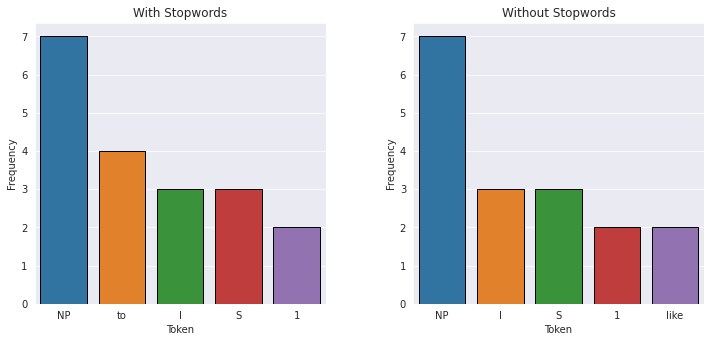


Session - 4



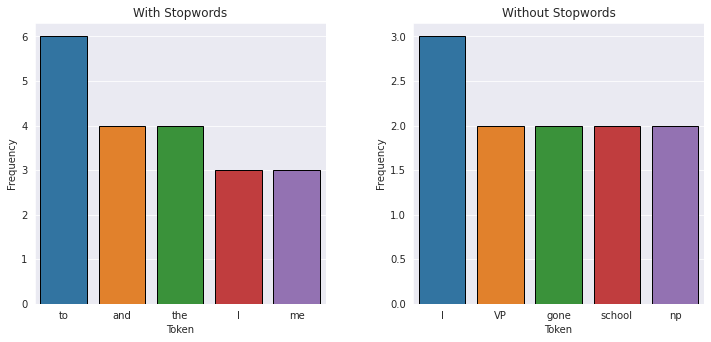


Session - 5



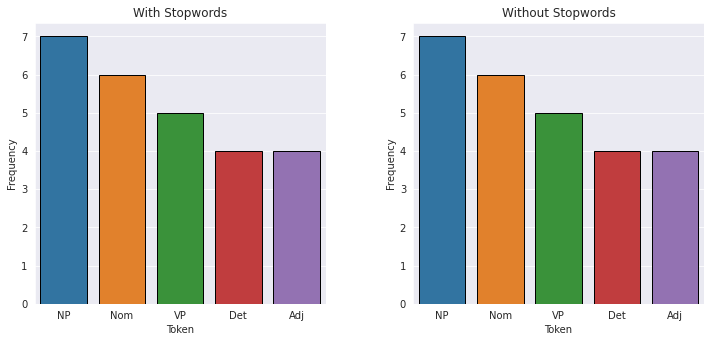


Session - 6



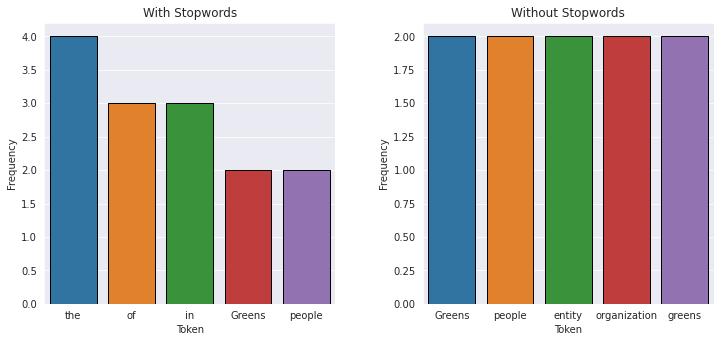


Session - 7



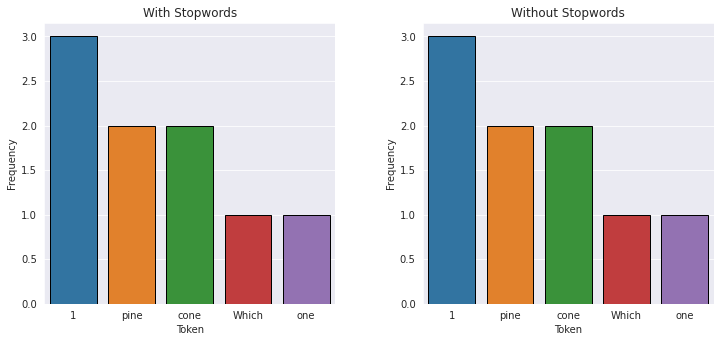


Session - 8



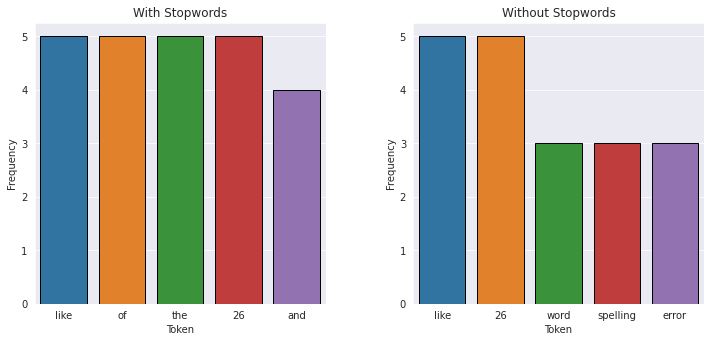

In [21]:
j = 0
for i in dataset:
  j += 1

  responses = ' '.join(get_student_responses(dataset[i], 'teacher_1')['Chat'].tolist())
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  responses = tokenizer.tokenize(responses)

  if responses == []:
    continue

  word_count_1 = {}
  for word in responses:
    if word in word_count_1:
      word_count_1[word] += 1
    else:
      word_count_1[word] = 1

  # ---- dictionary without stopword -----
  dict_without_stop = word_count_1.copy()
  for k in stopwords:
    if k in word_count_1:
      dict_without_stop.pop(k)

  word_count_1 = get_top_five(word_count_1)
  word_count_keys_1 = list(word_count_1.keys())

  dict_without_stop = get_top_five(dict_without_stop)
  dict_without_stop_keys = list(dict_without_stop.keys())

  print(f'\nSession - {j}\n')
  f, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5), edgecolor='k')
  f.subplots_adjust(hspace=0.5, wspace=0.3, bottom = 0.1)
  sns.barplot(x = word_count_keys_1, y = [word_count_1[k] for k in word_count_keys_1], edgecolor = 'black', ax=axes[0])
  sns.barplot(x = dict_without_stop_keys, y = [dict_without_stop[k] for k in dict_without_stop_keys], edgecolor = 'black', ax=axes[1])

  axes[0].set_title('With Stopwords')
  axes[0].set_xlabel('Token')
  axes[0].set_ylabel('Frequency')
  axes[1].set_title('Without Stopwords')
  axes[1].set_xlabel('Token')
  axes[1].set_ylabel('Frequency')
  plt.show()

# Abbreviations

In [22]:
def clean(chat_string): 
    # Special characters
    chat_string = re.sub(r"\x89Û_", "", chat_string)
    chat_string = re.sub(r"\x89ÛÒ", "", chat_string)
    chat_string = re.sub(r"\x89ÛÓ", "", chat_string)
    chat_string = re.sub(r"\x89ÛÏWhen", "When", chat_string)
    chat_string = re.sub(r"\x89ÛÏ", "", chat_string)
    chat_string = re.sub(r"China\x89Ûªs", "China's", chat_string)
    chat_string = re.sub(r"let\x89Ûªs", "let's", chat_string)
    chat_string = re.sub(r"\x89Û÷", "", chat_string)
    chat_string = re.sub(r"\x89Ûª", "", chat_string)
    chat_string = re.sub(r"\x89Û\x9d", "", chat_string)
    chat_string = re.sub(r"å_", "", chat_string)
    chat_string = re.sub(r"\x89Û¢", "", chat_string)
    chat_string = re.sub(r"\x89Û¢åÊ", "", chat_string)
    chat_string = re.sub(r"fromåÊwounds", "from wounds", chat_string)
    chat_string = re.sub(r"åÊ", "", chat_string)
    chat_string = re.sub(r"åÈ", "", chat_string)
    chat_string = re.sub(r"JapÌ_n", "Japan", chat_string)    
    chat_string = re.sub(r"Ì©", "e", chat_string)
    chat_string = re.sub(r"å¨", "", chat_string)
    chat_string = re.sub(r"SuruÌ¤", "Suruc", chat_string)
    chat_string = re.sub(r"åÇ", "", chat_string)
    chat_string = re.sub(r"å£3million", "3 million", chat_string)
    chat_string = re.sub(r"åÀ", "", chat_string)
    
    # Contractions
    chat_string = re.sub(r"he's", "he is", chat_string)
    chat_string = re.sub(r"there's", "there is", chat_string)
    chat_string = re.sub(r"We're", "We are", chat_string)
    chat_string = re.sub(r"That's", "That is", chat_string)
    chat_string = re.sub(r"won't", "will not", chat_string)
    chat_string = re.sub(r"they're", "they are", chat_string)
    chat_string = re.sub(r"Can't", "Cannot", chat_string)
    chat_string = re.sub(r"wasn't", "was not", chat_string)
    chat_string = re.sub(r"don\x89Ûªt", "do not", chat_string)
    chat_string = re.sub(r"aren't", "are not", chat_string)
    chat_string = re.sub(r"isn't", "is not", chat_string)
    chat_string = re.sub(r"What's", "What is", chat_string)
    chat_string = re.sub(r"haven't", "have not", chat_string)
    chat_string = re.sub(r"hasn't", "has not", chat_string)
    chat_string = re.sub(r"There's", "There is", chat_string)
    chat_string = re.sub(r"He's", "He is", chat_string)
    chat_string = re.sub(r"It's", "It is", chat_string)
    chat_string = re.sub(r"You're", "You are", chat_string)
    chat_string = re.sub(r"I'M", "I am", chat_string)
    chat_string = re.sub(r"shouldn't", "should not", chat_string)
    chat_string = re.sub(r"wouldn't", "would not", chat_string)
    chat_string = re.sub(r"i'm", "I am", chat_string)
    chat_string = re.sub(r"I\x89Ûªm", "I am", chat_string)
    chat_string = re.sub(r"I'm", "I am", chat_string)
    chat_string = re.sub(r"Isn't", "is not", chat_string)
    chat_string = re.sub(r"Here's", "Here is", chat_string)
    chat_string = re.sub(r"you've", "you have", chat_string)
    chat_string = re.sub(r"you\x89Ûªve", "you have", chat_string)
    chat_string = re.sub(r"we're", "we are", chat_string)
    chat_string = re.sub(r"what's", "what is", chat_string)
    chat_string = re.sub(r"couldn't", "could not", chat_string)
    chat_string = re.sub(r"we've", "we have", chat_string)
    chat_string = re.sub(r"it\x89Ûªs", "it is", chat_string)
    chat_string = re.sub(r"doesn\x89Ûªt", "does not", chat_string)
    chat_string = re.sub(r"It\x89Ûªs", "It is", chat_string)
    chat_string = re.sub(r"Here\x89Ûªs", "Here is", chat_string)
    chat_string = re.sub(r"who's", "who is", chat_string)
    chat_string = re.sub(r"I\x89Ûªve", "I have", chat_string)
    chat_string = re.sub(r"y'all", "you all", chat_string)
    chat_string = re.sub(r"can\x89Ûªt", "cannot", chat_string)
    chat_string = re.sub(r"would've", "would have", chat_string)
    chat_string = re.sub(r"it'll", "it will", chat_string)
    chat_string = re.sub(r"we'll", "we will", chat_string)
    chat_string = re.sub(r"wouldn\x89Ûªt", "would not", chat_string)
    chat_string = re.sub(r"We've", "We have", chat_string)
    chat_string = re.sub(r"he'll", "he will", chat_string)
    chat_string = re.sub(r"Y'all", "You all", chat_string)
    chat_string = re.sub(r"Weren't", "Were not", chat_string)
    chat_string = re.sub(r"Didn't", "Did not", chat_string)
    chat_string = re.sub(r"they'll", "they will", chat_string)
    chat_string = re.sub(r"they'd", "they would", chat_string)
    chat_string = re.sub(r"DON'T", "DO NOT", chat_string)
    chat_string = re.sub(r"That\x89Ûªs", "That is", chat_string)
    chat_string = re.sub(r"they've", "they have", chat_string)
    chat_string = re.sub(r"i'd", "I would", chat_string)
    chat_string = re.sub(r"should've", "should have", chat_string)
    chat_string = re.sub(r"You\x89Ûªre", "You are", chat_string)
    chat_string = re.sub(r"where's", "where is", chat_string)
    chat_string = re.sub(r"Don\x89Ûªt", "Do not", chat_string)
    chat_string = re.sub(r"we'd", "we would", chat_string)
    chat_string = re.sub(r"i'll", "I will", chat_string)
    chat_string = re.sub(r"weren't", "were not", chat_string)
    chat_string = re.sub(r"They're", "They are", chat_string)
    chat_string = re.sub(r"Can\x89Ûªt", "Cannot", chat_string)
    chat_string = re.sub(r"you\x89Ûªll", "you will", chat_string)
    chat_string = re.sub(r"I\x89Ûªd", "I would", chat_string)
    chat_string = re.sub(r"let's", "let us", chat_string)
    chat_string = re.sub(r"it's", "it is", chat_string)
    chat_string = re.sub(r"can't", "cannot", chat_string)
    chat_string = re.sub(r"don't", "do not", chat_string)
    chat_string = re.sub(r"you're", "you are", chat_string)
    chat_string = re.sub(r"i've", "I have", chat_string)
    chat_string = re.sub(r"that's", "that is", chat_string)
    chat_string = re.sub(r"i'll", "I will", chat_string)
    chat_string = re.sub(r"doesn't", "does not", chat_string)
    chat_string = re.sub(r"i'd", "I would", chat_string)
    chat_string = re.sub(r"didn't", "did not", chat_string)
    chat_string = re.sub(r"ain't", "am not", chat_string)
    chat_string = re.sub(r"you'll", "you will", chat_string)
    chat_string = re.sub(r"I've", "I have", chat_string)
    chat_string = re.sub(r"Don't", "do not", chat_string)
    chat_string = re.sub(r"I'll", "I will", chat_string)
    chat_string = re.sub(r"I'd", "I would", chat_string)
    chat_string = re.sub(r"Let's", "Let us", chat_string)
    chat_string = re.sub(r"you'd", "You would", chat_string)
    chat_string = re.sub(r"It's", "It is", chat_string)
    chat_string = re.sub(r"Ain't", "am not", chat_string)
    chat_string = re.sub(r"Haven't", "Have not", chat_string)
    chat_string = re.sub(r"Could've", "Could have", chat_string)
    chat_string = re.sub(r"youve", "you have", chat_string)  
    chat_string = re.sub(r"donå«t", "do not", chat_string)   
            
    # Character entity references
    chat_string = re.sub(r"&gt;", ">", chat_string)
    chat_string = re.sub(r"&lt;", "<", chat_string)
    chat_string = re.sub(r"&amp;", "&", chat_string)
    
    # Typos, slang and informal abbreviations
    chat_string = re.sub(r"w/e", "whatever", chat_string)
    chat_string = re.sub(r"w/", "with", chat_string)
    chat_string = re.sub(r"USAgov", "USA government", chat_string)
    chat_string = re.sub(r"recentlu", "recently", chat_string)
    chat_string = re.sub(r"Ph0tos", "Photos", chat_string)
    chat_string = re.sub(r"amirite", "am I right", chat_string)
    chat_string = re.sub(r"exp0sed", "exposed", chat_string)
    chat_string = re.sub(r"<3", "love", chat_string)
    chat_string = re.sub(r"amageddon", "armageddon", chat_string)
    chat_string = re.sub(r"Trfc", "Traffic", chat_string)
    chat_string = re.sub(r"8/5/2015", "2015-08-05", chat_string)
    chat_string = re.sub(r"WindStorm", "Wind Storm", chat_string)
    chat_string = re.sub(r"8/6/2015", "2015-08-06", chat_string)
    chat_string = re.sub(r"10:38PM", "10:38 PM", chat_string)
    chat_string = re.sub(r"10:30pm", "10:30 PM", chat_string)
    chat_string = re.sub(r"16yr", "16 year", chat_string)
    chat_string = re.sub(r"lmao", "laughing my ass off", chat_string)   
    chat_string = re.sub(r"TRAUMATISED", "traumatized", chat_string)
    
    # Hashtags and usernames
    chat_string = re.sub(r"IranDeal", "Iran Deal", chat_string)
    chat_string = re.sub(r"ArianaGrande", "Ariana Grande", chat_string)
    chat_string = re.sub(r"camilacabello97", "camila cabello", chat_string) 
    chat_string = re.sub(r"RondaRousey", "Ronda Rousey", chat_string)     
    chat_string = re.sub(r"MTVHottest", "MTV Hottest", chat_string)
    chat_string = re.sub(r"TrapMusic", "Trap Music", chat_string)
    chat_string = re.sub(r"ProphetMuhammad", "Prophet Muhammad", chat_string)
    chat_string = re.sub(r"PantherAttack", "Panther Attack", chat_string)
    chat_string = re.sub(r"StrategicPatience", "Strategic Patience", chat_string)
    chat_string = re.sub(r"socialnews", "social news", chat_string)
    chat_string = re.sub(r"NASAHurricane", "NASA Hurricane", chat_string)
    chat_string = re.sub(r"onlinecommunities", "online communities", chat_string)
    chat_string = re.sub(r"humanconsumption", "human consumption", chat_string)
    chat_string = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", chat_string)
    chat_string = re.sub(r"Meat-Loving", "Meat Loving", chat_string)
    chat_string = re.sub(r"facialabuse", "facial abuse", chat_string)
    chat_string = re.sub(r"LakeCounty", "Lake County", chat_string)
    chat_string = re.sub(r"BeingAuthor", "Being Author", chat_string)
    chat_string = re.sub(r"withheavenly", "with heavenly", chat_string)
    chat_string = re.sub(r"thankU", "thank you", chat_string)
    chat_string = re.sub(r"iTunesMusic", "iTunes Music", chat_string)
    chat_string = re.sub(r"OffensiveContent", "Offensive Content", chat_string)
    chat_string = re.sub(r"WorstSummerJob", "Worst Summer Job", chat_string)
    chat_string = re.sub(r"HarryBeCareful", "Harry Be Careful", chat_string)
    chat_string = re.sub(r"NASASolarSystem", "NASA Solar System", chat_string)
    chat_string = re.sub(r"animalrescue", "animal rescue", chat_string)
    chat_string = re.sub(r"KurtSchlichter", "Kurt Schlichter", chat_string)
    chat_string = re.sub(r"aRmageddon", "armageddon", chat_string)
    chat_string = re.sub(r"Throwingknifes", "Throwing knives", chat_string)
    chat_string = re.sub(r"GodsLove", "God's Love", chat_string)
    chat_string = re.sub(r"bookboost", "book boost", chat_string)
    chat_string = re.sub(r"ibooklove", "I book love", chat_string)
    chat_string = re.sub(r"NestleIndia", "Nestle India", chat_string)
    chat_string = re.sub(r"realDonaldTrump", "Donald Trump", chat_string)
    chat_string = re.sub(r"DavidVonderhaar", "David Vonderhaar", chat_string)
    chat_string = re.sub(r"CecilTheLion", "Cecil The Lion", chat_string)
    chat_string = re.sub(r"weathernetwork", "weather network", chat_string)
    chat_string = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", chat_string)
    chat_string = re.sub(r"Hostage&2", "Hostage & 2", chat_string)
    chat_string = re.sub(r"GOPDebate", "GOP Debate", chat_string)
    chat_string = re.sub(r"RickPerry", "Rick Perry", chat_string)
    chat_string = re.sub(r"frontpage", "front page", chat_string)
    chat_string = re.sub(r"NewsInTweets", "News In Tweets", chat_string)
    chat_string = re.sub(r"ViralSpell", "Viral Spell", chat_string)
    chat_string = re.sub(r"til_now", "until now", chat_string)
    chat_string = re.sub(r"volcanoinRussia", "volcano in Russia", chat_string)
    chat_string = re.sub(r"ZippedNews", "Zipped News", chat_string)
    chat_string = re.sub(r"MicheleBachman", "Michele Bachman", chat_string)
    chat_string = re.sub(r"53inch", "53 inch", chat_string)
    chat_string = re.sub(r"KerrickTrial", "Kerrick Trial", chat_string)
    chat_string = re.sub(r"abstorm", "Alberta Storm", chat_string)
    chat_string = re.sub(r"Beyhive", "Beyonce hive", chat_string)
    chat_string = re.sub(r"IDFire", "Idaho Fire", chat_string)
    chat_string = re.sub(r"DETECTADO", "Detected", chat_string)
    chat_string = re.sub(r"RockyFire", "Rocky Fire", chat_string)
    chat_string = re.sub(r"Listen/Buy", "Listen / Buy", chat_string)
    chat_string = re.sub(r"NickCannon", "Nick Cannon", chat_string)
    chat_string = re.sub(r"FaroeIslands", "Faroe Islands", chat_string)
    chat_string = re.sub(r"yycstorm", "Calgary Storm", chat_string)
    chat_string = re.sub(r"IDPs:", "Internally Displaced People :", chat_string)
    chat_string = re.sub(r"ArtistsUnited", "Artists United", chat_string)
    chat_string = re.sub(r"ClaytonBryant", "Clayton Bryant", chat_string)
    chat_string = re.sub(r"jimmyfallon", "jimmy fallon", chat_string)
    chat_string = re.sub(r"justinbieber", "justin bieber", chat_string)  
    chat_string = re.sub(r"UTC2015", "UTC 2015", chat_string)
    chat_string = re.sub(r"Time2015", "Time 2015", chat_string)
    chat_string = re.sub(r"djicemoon", "dj icemoon", chat_string)
    chat_string = re.sub(r"LivingSafely", "Living Safely", chat_string)
    chat_string = re.sub(r"FIFA16", "Fifa 2016", chat_string)
    chat_string = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", chat_string)
    chat_string = re.sub(r"bbcnews", "bbc news", chat_string)
    chat_string = re.sub(r"UndergroundRailraod", "Underground Railraod", chat_string)
    chat_string = re.sub(r"c4news", "c4 news", chat_string)
    chat_string = re.sub(r"OBLITERATION", "obliteration", chat_string)
    chat_string = re.sub(r"MUDSLIDE", "mudslide", chat_string)
    chat_string = re.sub(r"NoSurrender", "No Surrender", chat_string)
    chat_string = re.sub(r"NotExplained", "Not Explained", chat_string)
    chat_string = re.sub(r"greatbritishbakeoff", "great british bake off", chat_string)
    chat_string = re.sub(r"LondonFire", "London Fire", chat_string)
    chat_string = re.sub(r"KOTAWeather", "KOTA Weather", chat_string)
    chat_string = re.sub(r"LuchaUnderground", "Lucha Underground", chat_string)
    chat_string = re.sub(r"KOIN6News", "KOIN 6 News", chat_string)
    chat_string = re.sub(r"LiveOnK2", "Live On K2", chat_string)
    chat_string = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", chat_string)
    chat_string = re.sub(r"nikeplus", "nike plus", chat_string)
    chat_string = re.sub(r"david_cameron", "David Cameron", chat_string)
    chat_string = re.sub(r"peterjukes", "Peter Jukes", chat_string)
    chat_string = re.sub(r"JamesMelville", "James Melville", chat_string)
    chat_string = re.sub(r"megynkelly", "Megyn Kelly", chat_string)
    chat_string = re.sub(r"cnewslive", "C News Live", chat_string)
    chat_string = re.sub(r"JamaicaObserver", "Jamaica Observer", chat_string)
    chat_string = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", chat_string)
    chat_string = re.sub(r"cbplawyers", "cbp lawyers", chat_string)
    chat_string = re.sub(r"fewmorechat_strings", "few more chat_strings", chat_string)
    chat_string = re.sub(r"BlackLivesMatter", "Black Lives Matter", chat_string)
    chat_string = re.sub(r"cjoyner", "Chris Joyner", chat_string)
    chat_string = re.sub(r"ENGvAUS", "England vs Australia", chat_string)
    chat_string = re.sub(r"ScottWalker", "Scott Walker", chat_string)
    chat_string = re.sub(r"MikeParrActor", "Michael Parr", chat_string)
    chat_string = re.sub(r"4PlayThursdays", "Foreplay Thursdays", chat_string)
    chat_string = re.sub(r"TGF2015", "Tontitown Grape Festival", chat_string)
    chat_string = re.sub(r"realmandyrain", "Mandy Rain", chat_string)
    chat_string = re.sub(r"GraysonDolan", "Grayson Dolan", chat_string)
    chat_string = re.sub(r"ApolloBrown", "Apollo Brown", chat_string)
    chat_string = re.sub(r"saddlebrooke", "Saddlebrooke", chat_string)
    chat_string = re.sub(r"TontitownGrape", "Tontitown Grape", chat_string)
    chat_string = re.sub(r"AbbsWinston", "Abbs Winston", chat_string)
    chat_string = re.sub(r"ShaunKing", "Shaun King", chat_string)
    chat_string = re.sub(r"MeekMill", "Meek Mill", chat_string)
    chat_string = re.sub(r"TornadoGiveaway", "Tornado Giveaway", chat_string)
    chat_string = re.sub(r"GRupdates", "GR updates", chat_string)
    chat_string = re.sub(r"SouthDowns", "South Downs", chat_string)
    chat_string = re.sub(r"braininjury", "brain injury", chat_string)
    chat_string = re.sub(r"auspol", "Australian politics", chat_string)
    chat_string = re.sub(r"PlannedParenthood", "Planned Parenthood", chat_string)
    chat_string = re.sub(r"calgaryweather", "Calgary Weather", chat_string)
    chat_string = re.sub(r"weallheartonedirection", "we all heart one direction", chat_string)
    chat_string = re.sub(r"edsheeran", "Ed Sheeran", chat_string)
    chat_string = re.sub(r"TrueHeroes", "True Heroes", chat_string)
    chat_string = re.sub(r"S3XLEAK", "sex leak", chat_string)
    chat_string = re.sub(r"ComplexMag", "Complex Magazine", chat_string)
    chat_string = re.sub(r"TheAdvocateMag", "The Advocate Magazine", chat_string)
    chat_string = re.sub(r"CityofCalgary", "City of Calgary", chat_string)
    chat_string = re.sub(r"EbolaOutbreak", "Ebola Outbreak", chat_string)
    chat_string = re.sub(r"SummerFate", "Summer Fate", chat_string)
    chat_string = re.sub(r"RAmag", "Royal Academy Magazine", chat_string)
    chat_string = re.sub(r"offers2go", "offers to go", chat_string)
    chat_string = re.sub(r"foodscare", "food scare", chat_string)
    chat_string = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", chat_string)
    chat_string = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", chat_string)
    chat_string = re.sub(r"GamerGate", "Gamer Gate", chat_string)
    chat_string = re.sub(r"IHHen", "Humanitarian Relief", chat_string)
    chat_string = re.sub(r"spinningbot", "spinning bot", chat_string)
    chat_string = re.sub(r"ModiMinistry", "Modi Ministry", chat_string)
    chat_string = re.sub(r"TAXIWAYS", "taxi ways", chat_string)
    chat_string = re.sub(r"Calum5SOS", "Calum Hood", chat_string)
    chat_string = re.sub(r"po_st", "po.st", chat_string)
    chat_string = re.sub(r"scoopit", "scoop.it", chat_string)
    chat_string = re.sub(r"UltimaLucha", "Ultima Lucha", chat_string)
    chat_string = re.sub(r"JonathanFerrell", "Jonathan Ferrell", chat_string)
    chat_string = re.sub(r"aria_ahrary", "Aria Ahrary", chat_string)
    chat_string = re.sub(r"rapidcity", "Rapid City", chat_string)
    chat_string = re.sub(r"OutBid", "outbid", chat_string)
    chat_string = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", chat_string)
    chat_string = re.sub(r"EudryLantiqua", "Eudry Lantiqua", chat_string)
    chat_string = re.sub(r"15PM", "15 PM", chat_string)
    chat_string = re.sub(r"OriginalFunko", "Funko", chat_string)
    chat_string = re.sub(r"rightwaystan", "Richard Tan", chat_string)
    chat_string = re.sub(r"CindyNoonan", "Cindy Noonan", chat_string)
    chat_string = re.sub(r"RT_America", "RT America", chat_string)
    chat_string = re.sub(r"narendramodi", "Narendra Modi", chat_string)
    chat_string = re.sub(r"BakeOffFriends", "Bake Off Friends", chat_string)
    chat_string = re.sub(r"TeamHendrick", "Hendrick Motorsports", chat_string)
    chat_string = re.sub(r"alexbelloli", "Alex Belloli", chat_string)
    chat_string = re.sub(r"itsjustinstuart", "Justin Stuart", chat_string)
    chat_string = re.sub(r"gunsense", "gun sense", chat_string)
    chat_string = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", chat_string)
    chat_string = re.sub(r"RoyalCarribean", "Royal Carribean", chat_string)
    chat_string = re.sub(r"samanthaturne19", "Samantha Turner", chat_string)
    chat_string = re.sub(r"JonVoyage", "Jon Stewart", chat_string)
    chat_string = re.sub(r"renew911health", "renew 911 health", chat_string)
    chat_string = re.sub(r"SuryaRay", "Surya Ray", chat_string)
    chat_string = re.sub(r"pattonoswalt", "Patton Oswalt", chat_string)
    chat_string = re.sub(r"minhazmerchant", "Minhaz Merchant", chat_string)
    chat_string = re.sub(r"TLVFaces", "Israel Diaspora Coalition", chat_string)
    chat_string = re.sub(r"pmarca", "Marc Andreessen", chat_string)
    chat_string = re.sub(r"pdx911", "Portland Police", chat_string)
    chat_string = re.sub(r"jamaicaplain", "Jamaica Plain", chat_string)
    chat_string = re.sub(r"Japton", "Arkansas", chat_string)
    chat_string = re.sub(r"RouteComplex", "Route Complex", chat_string)
    chat_string = re.sub(r"INSubcontinent", "Indian Subcontinent", chat_string)
    chat_string = re.sub(r"NJTurnpike", "New Jersey Turnpike", chat_string)
    chat_string = re.sub(r"Politifiact", "PolitiFact", chat_string)
    chat_string = re.sub(r"Hiroshima70", "Hiroshima", chat_string)
    chat_string = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", chat_string)
    chat_string = re.sub(r"versethe", "verse the", chat_string)
    chat_string = re.sub(r"TubeStrike", "Tube Strike", chat_string)
    chat_string = re.sub(r"MissionHills", "Mission Hills", chat_string)
    chat_string = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", chat_string)
    chat_string = re.sub(r"NANKANA", "Nankana", chat_string)
    chat_string = re.sub(r"SAHIB", "Sahib", chat_string)
    chat_string = re.sub(r"PAKPATTAN", "Pakpattan", chat_string)
    chat_string = re.sub(r"Newz_Sacramento", "News Sacramento", chat_string)
    chat_string = re.sub(r"gofundme", "go fund me", chat_string)
    chat_string = re.sub(r"pmharper", "Stephen Harper", chat_string)
    chat_string = re.sub(r"IvanBerroa", "Ivan Berroa", chat_string)
    chat_string = re.sub(r"LosDelSonido", "Los Del Sonido", chat_string)
    chat_string = re.sub(r"bancodeseries", "banco de series", chat_string)
    chat_string = re.sub(r"timkaine", "Tim Kaine", chat_string)
    chat_string = re.sub(r"IdentityTheft", "Identity Theft", chat_string)
    chat_string = re.sub(r"AllLivesMatter", "All Lives Matter", chat_string)
    chat_string = re.sub(r"mishacollins", "Misha Collins", chat_string)
    chat_string = re.sub(r"BillNeelyNBC", "Bill Neely", chat_string)
    chat_string = re.sub(r"BeClearOnCancer", "be clear on cancer", chat_string)
    chat_string = re.sub(r"Kowing", "Knowing", chat_string)
    chat_string = re.sub(r"ScreamQueens", "Scream Queens", chat_string)
    chat_string = re.sub(r"AskCharley", "Ask Charley", chat_string)
    chat_string = re.sub(r"BlizzHeroes", "Heroes of the Storm", chat_string)
    chat_string = re.sub(r"BradleyBrad47", "Bradley Brad", chat_string)
    chat_string = re.sub(r"HannaPH", "Typhoon Hanna", chat_string)
    chat_string = re.sub(r"meinlcymbals", "MEINL Cymbals", chat_string)
    chat_string = re.sub(r"Ptbo", "Peterborough", chat_string)
    chat_string = re.sub(r"cnnbrk", "CNN Breaking News", chat_string)
    chat_string = re.sub(r"IndianNews", "Indian News", chat_string)
    chat_string = re.sub(r"savebees", "save bees", chat_string)
    chat_string = re.sub(r"GreenHarvard", "Green Harvard", chat_string)
    chat_string = re.sub(r"StandwithPP", "Stand with planned parenthood", chat_string)
    chat_string = re.sub(r"hermancranston", "Herman Cranston", chat_string)
    chat_string = re.sub(r"WMUR9", "WMUR-TV", chat_string)
    chat_string = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", chat_string)
    chat_string = re.sub(r"ameenshaikh3", "Ameen Shaikh", chat_string)
    chat_string = re.sub(r"ProSyn", "Project Syndicate", chat_string)
    chat_string = re.sub(r"Daesh", "ISIS", chat_string)
    chat_string = re.sub(r"s2g", "swear to god", chat_string)
    chat_string = re.sub(r"listenlive", "listen live", chat_string)
    chat_string = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", chat_string)
    chat_string = re.sub(r"FoxNew", "Fox News", chat_string)
    chat_string = re.sub(r"CBSBigBrother", "Big Brother", chat_string)
    chat_string = re.sub(r"JulieDiCaro", "Julie DiCaro", chat_string)
    chat_string = re.sub(r"theadvocatemag", "The Advocate Magazine", chat_string)
    chat_string = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", chat_string)
    chat_string = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", chat_string)
    chat_string = re.sub(r"Popularmmos", "Popular MMOs", chat_string)
    chat_string = re.sub(r"WildHorses", "Wild Horses", chat_string)
    chat_string = re.sub(r"FantasticFour", "Fantastic Four", chat_string)
    chat_string = re.sub(r"HORNDALE", "Horndale", chat_string)
    chat_string = re.sub(r"PINER", "Piner", chat_string)
    chat_string = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", chat_string)
    chat_string = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", chat_string)
    chat_string = re.sub(r"residualincome", "residual income", chat_string)
    chat_string = re.sub(r"YahooNewsDigest", "Yahoo News Digest", chat_string)
    chat_string = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", chat_string)
    chat_string = re.sub(r"AmazonDeals", "Amazon Deals", chat_string)
    chat_string = re.sub(r"MissCharleyWebb", "Charley Webb", chat_string)
    chat_string = re.sub(r"shoalstraffic", "shoals traffic", chat_string)
    chat_string = re.sub(r"GeorgeFoster72", "George Foster", chat_string)
    chat_string = re.sub(r"pop2015", "pop 2015", chat_string)
    chat_string = re.sub(r"_PokemonCards_", "Pokemon Cards", chat_string)
    chat_string = re.sub(r"DianneG", "Dianne Gallagher", chat_string)
    chat_string = re.sub(r"KashmirConflict", "Kashmir Conflict", chat_string)
    chat_string = re.sub(r"BritishBakeOff", "British Bake Off", chat_string)
    chat_string = re.sub(r"FreeKashmir", "Free Kashmir", chat_string)
    chat_string = re.sub(r"mattmosley", "Matt Mosley", chat_string)
    chat_string = re.sub(r"BishopFred", "Bishop Fred", chat_string)
    chat_string = re.sub(r"EndConflict", "End Conflict", chat_string)
    chat_string = re.sub(r"EndOccupation", "End Occupation", chat_string)
    chat_string = re.sub(r"UNHEALED", "unhealed", chat_string)
    chat_string = re.sub(r"CharlesDagnall", "Charles Dagnall", chat_string)
    chat_string = re.sub(r"Latestnews", "Latest news", chat_string)
    chat_string = re.sub(r"KindleCountdown", "Kindle Countdown", chat_string)
    chat_string = re.sub(r"NoMoreHandouts", "No More Handouts", chat_string)
    chat_string = re.sub(r"datingtips", "dating tips", chat_string)
    chat_string = re.sub(r"charlesadler", "Charles Adler", chat_string)
    chat_string = re.sub(r"twia", "Texas Windstorm Insurance Association", chat_string)
    chat_string = re.sub(r"txlege", "Texas Legislature", chat_string)
    chat_string = re.sub(r"WindstormInsurer", "Windstorm Insurer", chat_string)
    chat_string = re.sub(r"Newss", "News", chat_string)
    chat_string = re.sub(r"hempoil", "hemp oil", chat_string)
    chat_string = re.sub(r"CommoditiesAre", "Commodities are", chat_string)
    chat_string = re.sub(r"tubestrike", "tube strike", chat_string)
    chat_string = re.sub(r"JoeNBC", "Joe Scarborough", chat_string)
    chat_string = re.sub(r"LiteraryCakes", "Literary Cakes", chat_string)
    chat_string = re.sub(r"TI5", "The International 5", chat_string)
    chat_string = re.sub(r"thehill", "the hill", chat_string)
    chat_string = re.sub(r"3others", "3 others", chat_string)
    chat_string = re.sub(r"stighefootball", "Sam Tighe", chat_string)
    chat_string = re.sub(r"whatstheimportantvideo", "what is the important video", chat_string)
    chat_string = re.sub(r"ClaudioMeloni", "Claudio Meloni", chat_string)
    chat_string = re.sub(r"DukeSkywalker", "Duke Skywalker", chat_string)
    chat_string = re.sub(r"carsonmwr", "Fort Carson", chat_string)
    chat_string = re.sub(r"offdishduty", "off dish duty", chat_string)
    chat_string = re.sub(r"andword", "and word", chat_string)
    chat_string = re.sub(r"rhodeisland", "Rhode Island", chat_string)
    chat_string = re.sub(r"easternoregon", "Eastern Oregon", chat_string)
    chat_string = re.sub(r"WAwildfire", "Washington Wildfire", chat_string)
    chat_string = re.sub(r"fingerrockfire", "Finger Rock Fire", chat_string)
    chat_string = re.sub(r"57am", "57 am", chat_string)
    chat_string = re.sub(r"fingerrockfire", "Finger Rock Fire", chat_string)
    chat_string = re.sub(r"JacobHoggard", "Jacob Hoggard", chat_string)
    chat_string = re.sub(r"newnewnew", "new new new", chat_string)
    chat_string = re.sub(r"under50", "under 50", chat_string)
    chat_string = re.sub(r"getitbeforeitsgone", "get it before it is gone", chat_string)
    chat_string = re.sub(r"freshoutofthebox", "fresh out of the box", chat_string)
    chat_string = re.sub(r"amwriting", "am writing", chat_string)
    chat_string = re.sub(r"Bokoharm", "Boko Haram", chat_string)
    chat_string = re.sub(r"Nowlike", "Now like", chat_string)
    chat_string = re.sub(r"seasonfrom", "season from", chat_string)
    chat_string = re.sub(r"epicente", "epicenter", chat_string)
    chat_string = re.sub(r"epicenterr", "epicenter", chat_string)
    chat_string = re.sub(r"sicklife", "sick life", chat_string)
    chat_string = re.sub(r"yycweather", "Calgary Weather", chat_string)
    chat_string = re.sub(r"calgarysun", "Calgary Sun", chat_string)
    chat_string = re.sub(r"approachng", "approaching", chat_string)
    chat_string = re.sub(r"evng", "evening", chat_string)
    chat_string = re.sub(r"Sumthng", "something", chat_string)
    chat_string = re.sub(r"EllenPompeo", "Ellen Pompeo", chat_string)
    chat_string = re.sub(r"shondarhimes", "Shonda Rhimes", chat_string)
    chat_string = re.sub(r"ABCNetwork", "ABC Network", chat_string)
    chat_string = re.sub(r"SushmaSwaraj", "Sushma Swaraj", chat_string)
    chat_string = re.sub(r"pray4japan", "Pray for Japan", chat_string)
    chat_string = re.sub(r"hope4japan", "Hope for Japan", chat_string)
    chat_string = re.sub(r"Illusionimagess", "Illusion images", chat_string)
    chat_string = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", chat_string)
    chat_string = re.sub(r"ShallWeDance", "Shall We Dance", chat_string)
    chat_string = re.sub(r"TCMParty", "TCM Party", chat_string)
    chat_string = re.sub(r"marijuananews", "marijuana news", chat_string)
    chat_string = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", chat_string)
    chat_string = re.sub(r"Beingchat_strings", "Being chat_strings", chat_string)
    chat_string = re.sub(r"newauthors", "new authors", chat_string)
    chat_string = re.sub(r"remedyyyy", "remedy", chat_string)
    chat_string = re.sub(r"44PM", "44 PM", chat_string)
    chat_string = re.sub(r"HeadlinesApp", "Headlines App", chat_string)
    chat_string = re.sub(r"40PM", "40 PM", chat_string)
    chat_string = re.sub(r"myswc", "Severe Weather Center", chat_string)
    chat_string = re.sub(r"ithats", "that is", chat_string)
    chat_string = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", chat_string)
    chat_string = re.sub(r"FatLoss", "Fat Loss", chat_string)
    chat_string = re.sub(r"02PM", "02 PM", chat_string)
    chat_string = re.sub(r"MetroFmTalk", "Metro Fm Talk", chat_string)
    chat_string = re.sub(r"Bstrd", "bastard", chat_string)
    chat_string = re.sub(r"bldy", "bloody", chat_string)
    chat_string = re.sub(r"MetrofmTalk", "Metro Fm Talk", chat_string)
    chat_string = re.sub(r"terrorismturn", "terrorism turn", chat_string)
    chat_string = re.sub(r"BBCNewsAsia", "BBC News Asia", chat_string)
    chat_string = re.sub(r"BehindTheScenes", "Behind The Scenes", chat_string)
    chat_string = re.sub(r"GeorgeTakei", "George Takei", chat_string)
    chat_string = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", chat_string)
    chat_string = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", chat_string)
    chat_string = re.sub(r"incubusband", "incubus band", chat_string)
    chat_string = re.sub(r"Babypicturethis", "Baby picture this", chat_string)
    chat_string = re.sub(r"BombEffects", "Bomb Effects", chat_string)
    chat_string = re.sub(r"win10", "Windows 10", chat_string)
    chat_string = re.sub(r"idkidk", "I do not know I do not know", chat_string)
    chat_string = re.sub(r"TheWalkingDead", "The Walking Dead", chat_string)
    chat_string = re.sub(r"amyschumer", "Amy Schumer", chat_string)
    chat_string = re.sub(r"crewlist", "crew list", chat_string)
    chat_string = re.sub(r"Erdogans", "Erdogan", chat_string)
    chat_string = re.sub(r"BBCLive", "BBC Live", chat_string)
    chat_string = re.sub(r"TonyAbbottMHR", "Tony Abbott", chat_string)
    chat_string = re.sub(r"paulmyerscough", "Paul Myerscough", chat_string)
    chat_string = re.sub(r"georgegallagher", "George Gallagher", chat_string)
    chat_string = re.sub(r"JimmieJohnson", "Jimmie Johnson", chat_string)
    chat_string = re.sub(r"pctool", "pc tool", chat_string)
    chat_string = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", chat_string)
    chat_string = re.sub(r"ThrowbackThursday", "Throwback Thursday", chat_string)
    chat_string = re.sub(r"SnowBackSunday", "Snowback Sunday", chat_string)
    chat_string = re.sub(r"LakeEffect", "Lake Effect", chat_string)
    chat_string = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", chat_string)
    chat_string = re.sub(r"BigBang_CBS", "Big Bang CBS", chat_string)
    chat_string = re.sub(r"writerslife", "writers life", chat_string)
    chat_string = re.sub(r"NaturalBirth", "Natural Birth", chat_string)
    chat_string = re.sub(r"UnusualWords", "Unusual Words", chat_string)
    chat_string = re.sub(r"wizkhalifa", "Wiz Khalifa", chat_string)
    chat_string = re.sub(r"acreativedc", "a creative DC", chat_string)
    chat_string = re.sub(r"vscodc", "vsco DC", chat_string)
    chat_string = re.sub(r"VSCOcam", "vsco camera", chat_string)
    chat_string = re.sub(r"TheBEACHDC", "The beach DC", chat_string)
    chat_string = re.sub(r"buildingmuseum", "building museum", chat_string)
    chat_string = re.sub(r"WorldOil", "World Oil", chat_string)
    chat_string = re.sub(r"redwedding", "red wedding", chat_string)
    chat_string = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", chat_string)
    chat_string = re.sub(r"WakeUpAmerica", "Wake Up America", chat_string)
    chat_string = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", chat_string)
    chat_string = re.sub(r"bleased", "blessed", chat_string)
    chat_string = re.sub(r"nigeriantribune", "Nigerian Tribune", chat_string)
    chat_string = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", chat_string)
    chat_string = re.sub(r"FusionFestival", "Fusion Festival", chat_string)
    chat_string = re.sub(r"50Mixed", "50 Mixed", chat_string)
    chat_string = re.sub(r"NoAgenda", "No Agenda", chat_string)
    chat_string = re.sub(r"WhiteGenocide", "White Genocide", chat_string)
    chat_string = re.sub(r"dirtylying", "dirty lying", chat_string)
    chat_string = re.sub(r"SyrianRefugees", "Syrian Refugees", chat_string)
    chat_string = re.sub(r"changetheworld", "change the world", chat_string)
    chat_string = re.sub(r"Ebolacase", "Ebola case", chat_string)
    chat_string = re.sub(r"mcgtech", "mcg technologies", chat_string)
    chat_string = re.sub(r"withweapons", "with weapons", chat_string)
    chat_string = re.sub(r"advancedwarfare", "advanced warfare", chat_string)
    chat_string = re.sub(r"letsFootball", "let us Football", chat_string)
    chat_string = re.sub(r"LateNiteMix", "late night mix", chat_string)
    chat_string = re.sub(r"PhilCollinsFeed", "Phil Collins", chat_string)
    chat_string = re.sub(r"RudyHavenstein", "Rudy Havenstein", chat_string)
    chat_string = re.sub(r"22PM", "22 PM", chat_string)
    chat_string = re.sub(r"54am", "54 AM", chat_string)
    chat_string = re.sub(r"38am", "38 AM", chat_string)
    chat_string = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", chat_string)
    chat_string = re.sub(r"BlacklivesMatter", "Black Lives Matter", chat_string)
    chat_string = re.sub(r"InsaneLimits", "Insane Limits", chat_string)
    chat_string = re.sub(r"youcantsitwithus", "you cannot sit with us", chat_string)
    chat_string = re.sub(r"2k15", "2015", chat_string)
    chat_string = re.sub(r"TheIran", "Iran", chat_string)
    chat_string = re.sub(r"JimmyFallon", "Jimmy Fallon", chat_string)
    chat_string = re.sub(r"AlbertBrooks", "Albert Brooks", chat_string)
    chat_string = re.sub(r"defense_news", "defense news", chat_string)
    chat_string = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", chat_string)
    chat_string = re.sub(r"Auspol", "Australia Politics", chat_string)
    chat_string = re.sub(r"NuclearPower", "Nuclear Power", chat_string)
    chat_string = re.sub(r"WhiteTerrorism", "White Terrorism", chat_string)
    chat_string = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", chat_string)
    chat_string = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", chat_string)
    chat_string = re.sub(r"ProBonoNews", "Pro Bono News", chat_string)
    chat_string = re.sub(r"JakartaPost", "Jakarta Post", chat_string)
    chat_string = re.sub(r"toopainful", "too painful", chat_string)
    chat_string = re.sub(r"melindahaunton", "Melinda Haunton", chat_string)
    chat_string = re.sub(r"NoNukes", "No Nukes", chat_string)
    chat_string = re.sub(r"curryspcworld", "Currys PC World", chat_string)
    chat_string = re.sub(r"ineedcake", "I need cake", chat_string)
    chat_string = re.sub(r"blackforestgateau", "black forest gateau", chat_string)
    chat_string = re.sub(r"BBCOne", "BBC One", chat_string)
    chat_string = re.sub(r"AlexxPage", "Alex Page", chat_string)
    chat_string = re.sub(r"jonathanserrie", "Jonathan Serrie", chat_string)
    chat_string = re.sub(r"SocialJerkBlog", "Social Jerk Blog", chat_string)
    chat_string = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", chat_string)
    chat_string = re.sub(r"irongiant", "iron giant", chat_string)
    chat_string = re.sub(r"RonFunches", "Ron Funches", chat_string)
    chat_string = re.sub(r"TimCook", "Tim Cook", chat_string)
    chat_string = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", chat_string)
    chat_string = re.sub(r"Madsummer", "Mad summer", chat_string)
    chat_string = re.sub(r"NowYouKnow", "Now you know", chat_string)
    chat_string = re.sub(r"concertphotography", "concert photography", chat_string)
    chat_string = re.sub(r"TomLandry", "Tom Landry", chat_string)
    chat_string = re.sub(r"showgirldayoff", "show girl day off", chat_string)
    chat_string = re.sub(r"Yougslavia", "Yugoslavia", chat_string)
    chat_string = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", chat_string)
    chat_string = re.sub(r"FromTheDesk", "From The Desk", chat_string)
    chat_string = re.sub(r"TheaterTrial", "Theater Trial", chat_string)
    chat_string = re.sub(r"CatoInstitute", "Cato Institute", chat_string)
    chat_string = re.sub(r"EmekaGift", "Emeka Gift", chat_string)
    chat_string = re.sub(r"LetsBe_Rational", "Let us be rational", chat_string)
    chat_string = re.sub(r"Cynicalreality", "Cynical reality", chat_string)
    chat_string = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", chat_string)
    chat_string = re.sub(r"NotSorry", "not sorry", chat_string)
    chat_string = re.sub(r"UseYourWords", "use your words", chat_string)
    chat_string = re.sub(r"WordoftheDay", "word of the day", chat_string)
    chat_string = re.sub(r"Dictionarycom", "Dictionary.com", chat_string)
    chat_string = re.sub(r"TheBrooklynLife", "The Brooklyn Life", chat_string)
    chat_string = re.sub(r"jokethey", "joke they", chat_string)
    chat_string = re.sub(r"nflweek1picks", "NFL week 1 picks", chat_string)
    chat_string = re.sub(r"uiseful", "useful", chat_string)
    chat_string = re.sub(r"JusticeDotOrg", "The American Association for Justice", chat_string)
    chat_string = re.sub(r"autoaccidents", "auto accidents", chat_string)
    chat_string = re.sub(r"SteveGursten", "Steve Gursten", chat_string)
    chat_string = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", chat_string)
    chat_string = re.sub(r"birdgang", "bird gang", chat_string)
    chat_string = re.sub(r"nflnetwork", "NFL Network", chat_string)
    chat_string = re.sub(r"NYDNSports", "NY Daily News Sports", chat_string)
    chat_string = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", chat_string)
    chat_string = re.sub(r"EdmontonEsks", "Edmonton Eskimos", chat_string)
    chat_string = re.sub(r"david_brelsford", "David Brelsford", chat_string)
    chat_string = re.sub(r"TOI_India", "The Times of India", chat_string)
    chat_string = re.sub(r"hegot", "he got", chat_string)
    chat_string = re.sub(r"SkinsOn9", "Skins on 9", chat_string)
    chat_string = re.sub(r"sothathappened", "so that happened", chat_string)
    chat_string = re.sub(r"LCOutOfDoors", "LC Out Of Doors", chat_string)
    chat_string = re.sub(r"NationFirst", "Nation First", chat_string)
    chat_string = re.sub(r"IndiaToday", "India Today", chat_string)
    chat_string = re.sub(r"HLPS", "helps", chat_string)
    chat_string = re.sub(r"HOSTAGESTHROSW", "hostages throw", chat_string)
    chat_string = re.sub(r"SNCTIONS", "sanctions", chat_string)
    chat_string = re.sub(r"BidTime", "Bid Time", chat_string)
    chat_string = re.sub(r"crunchysensible", "crunchy sensible", chat_string)
    chat_string = re.sub(r"RandomActsOfRomance", "Random acts of romance", chat_string)
    chat_string = re.sub(r"MomentsAtHill", "Moments at hill", chat_string)
    chat_string = re.sub(r"eatshit", "eat shit", chat_string)
    chat_string = re.sub(r"liveleakfun", "live leak fun", chat_string)
    chat_string = re.sub(r"SahelNews", "Sahel News", chat_string)
    chat_string = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", chat_string)
    chat_string = re.sub(r"facilitiesmanagement", "facilities management", chat_string)
    chat_string = re.sub(r"facilitydude", "facility dude", chat_string)
    chat_string = re.sub(r"CampLogistics", "Camp logistics", chat_string)
    chat_string = re.sub(r"alaskapublic", "Alaska public", chat_string)
    chat_string = re.sub(r"MarketResearch", "Market Research", chat_string)
    chat_string = re.sub(r"AccuracyEsports", "Accuracy Esports", chat_string)
    chat_string = re.sub(r"TheBodyShopAust", "The Body Shop Australia", chat_string)
    chat_string = re.sub(r"yychail", "Calgary hail", chat_string)
    chat_string = re.sub(r"yyctraffic", "Calgary traffic", chat_string)
    chat_string = re.sub(r"eliotschool", "eliot school", chat_string)
    chat_string = re.sub(r"TheBrokenCity", "The Broken City", chat_string)
    chat_string = re.sub(r"OldsFireDept", "Olds Fire Department", chat_string)
    chat_string = re.sub(r"RiverComplex", "River Complex", chat_string)
    chat_string = re.sub(r"fieldworksmells", "field work smells", chat_string)
    chat_string = re.sub(r"IranElection", "Iran Election", chat_string)
    chat_string = re.sub(r"glowng", "glowing", chat_string)
    chat_string = re.sub(r"kindlng", "kindling", chat_string)
    chat_string = re.sub(r"riggd", "rigged", chat_string)
    chat_string = re.sub(r"slownewsday", "slow news day", chat_string)
    chat_string = re.sub(r"MyanmarFlood", "Myanmar Flood", chat_string)
    chat_string = re.sub(r"abc7chicago", "ABC 7 Chicago", chat_string)
    chat_string = re.sub(r"copolitics", "Colorado Politics", chat_string)
    chat_string = re.sub(r"AdilGhumro", "Adil Ghumro", chat_string)
    chat_string = re.sub(r"netbots", "net bots", chat_string)
    chat_string = re.sub(r"byebyeroad", "bye bye road", chat_string)
    chat_string = re.sub(r"massiveflooding", "massive flooding", chat_string)
    chat_string = re.sub(r"EndofUS", "End of United States", chat_string)
    chat_string = re.sub(r"35PM", "35 PM", chat_string)
    chat_string = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", chat_string)
    chat_string = re.sub(r"76mins", "76 minutes", chat_string)
    chat_string = re.sub(r"publicsafetyfirst", "public safety first", chat_string)
    chat_string = re.sub(r"livesmatter", "lives matter", chat_string)
    chat_string = re.sub(r"myhometown", "my hometown", chat_string)
    chat_string = re.sub(r"tankerfire", "tanker fire", chat_string)
    chat_string = re.sub(r"MEMORIALDAY", "memorial day", chat_string)
    chat_string = re.sub(r"MEMORIAL_DAY", "memorial day", chat_string)
    chat_string = re.sub(r"instaxbooty", "instagram booty", chat_string)
    chat_string = re.sub(r"Jerusalem_Post", "Jerusalem Post", chat_string)
    chat_string = re.sub(r"WayneRooney_INA", "Wayne Rooney", chat_string)
    chat_string = re.sub(r"VirtualReality", "Virtual Reality", chat_string)
    chat_string = re.sub(r"OculusRift", "Oculus Rift", chat_string)
    chat_string = re.sub(r"OwenJones84", "Owen Jones", chat_string)
    chat_string = re.sub(r"jeremycorbyn", "Jeremy Corbyn", chat_string)
    chat_string = re.sub(r"paulrogers002", "Paul Rogers", chat_string)
    chat_string = re.sub(r"mortalkombatx", "Mortal Kombat X", chat_string)
    chat_string = re.sub(r"mortalkombat", "Mortal Kombat", chat_string)
    chat_string = re.sub(r"FilipeCoelho92", "Filipe Coelho", chat_string)
    chat_string = re.sub(r"OnlyQuakeNews", "Only Quake News", chat_string)
    chat_string = re.sub(r"kostumes", "costumes", chat_string)
    chat_string = re.sub(r"YEEESSSS", "yes", chat_string)
    chat_string = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", chat_string)
    chat_string = re.sub(r"IntlDevelopment", "Intl Development", chat_string)
    chat_string = re.sub(r"ExtremeWeather", "Extreme Weather", chat_string)
    chat_string = re.sub(r"WereNotGruberVoters", "We are not gruber voters", chat_string)
    chat_string = re.sub(r"NewsThousands", "News Thousands", chat_string)
    chat_string = re.sub(r"EdmundAdamus", "Edmund Adamus", chat_string)
    chat_string = re.sub(r"EyewitnessWV", "Eye witness WV", chat_string)
    chat_string = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", chat_string)
    chat_string = re.sub(r"DublinComicCon", "Dublin Comic Con", chat_string)
    chat_string = re.sub(r"NicholasBrendon", "Nicholas Brendon", chat_string)
    chat_string = re.sub(r"Alltheway80s", "All the way 80s", chat_string)
    chat_string = re.sub(r"FromTheField", "From the field", chat_string)
    chat_string = re.sub(r"NorthIowa", "North Iowa", chat_string)
    chat_string = re.sub(r"WillowFire", "Willow Fire", chat_string)
    chat_string = re.sub(r"MadRiverComplex", "Mad River Complex", chat_string)
    chat_string = re.sub(r"feelingmanly", "feeling manly", chat_string)
    chat_string = re.sub(r"stillnotoverit", "still not over it", chat_string)
    chat_string = re.sub(r"FortitudeValley", "Fortitude Valley", chat_string)
    chat_string = re.sub(r"CoastpowerlineTramTr", "Coast powerline", chat_string)
    chat_string = re.sub(r"ServicesGold", "Services Gold", chat_string)
    chat_string = re.sub(r"NewsbrokenEmergency", "News broken emergency", chat_string)
    chat_string = re.sub(r"Evaucation", "evacuation", chat_string)
    chat_string = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", chat_string)
    chat_string = re.sub(r"P_EOPLE", "PEOPLE", chat_string)
    chat_string = re.sub(r"Tubestrike", "tube strike", chat_string)
    chat_string = re.sub(r"CLASS_SICK", "CLASS SICK", chat_string)
    chat_string = re.sub(r"localplumber", "local plumber", chat_string)
    chat_string = re.sub(r"awesomejobsiri", "awesome job siri", chat_string)
    chat_string = re.sub(r"PayForItHow", "Pay for it how", chat_string)
    chat_string = re.sub(r"ThisIsAfrica", "This is Africa", chat_string)
    chat_string = re.sub(r"crimeairnetwork", "crime air network", chat_string)
    chat_string = re.sub(r"KimAcheson", "Kim Acheson", chat_string)
    chat_string = re.sub(r"cityofcalgary", "City of Calgary", chat_string)
    chat_string = re.sub(r"prosyndicate", "pro syndicate", chat_string)
    chat_string = re.sub(r"660NEWS", "660 NEWS", chat_string)
    chat_string = re.sub(r"BusInsMagazine", "Business Insurance Magazine", chat_string)
    chat_string = re.sub(r"wfocus", "focus", chat_string)
    chat_string = re.sub(r"ShastaDam", "Shasta Dam", chat_string)
    chat_string = re.sub(r"go2MarkFranco", "Mark Franco", chat_string)
    chat_string = re.sub(r"StephGHinojosa", "Steph Hinojosa", chat_string)
    chat_string = re.sub(r"Nashgrier", "Nash Grier", chat_string)
    chat_string = re.sub(r"NashNewVideo", "Nash new video", chat_string)
    chat_string = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", chat_string)
    chat_string = re.sub(r"SHGames", "Sledgehammer Games", chat_string)
    chat_string = re.sub(r"bedhair", "bed hair", chat_string)
    chat_string = re.sub(r"JoelHeyman", "Joel Heyman", chat_string)
    chat_string = re.sub(r"viaYouTube", "via YouTube", chat_string)

    return chat_string

# H